In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
import os

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

68606236/68606236 [==============================] - 2s 0us/step


In [18]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [13]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-19-d70e0a339f06>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 13s 258ms/step - loss: 0.7026 - accuracy: 0.5030 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoch 2/100
20/20 [==============================] - 5s 247ms/step - loss: 0.6870 - accuracy: 0.5285 - val_loss: 0.6845 - val_accuracy: 0.5010
Epoch 3/100
20/20 [==============================] - 6s 300ms/step - loss: 0.6782 - accuracy: 0.5860 - val_loss: 0.6538 - val_accuracy: 0.6490
Epoch 4/100
20/20 [==============================] - 5s 269ms/step - loss: 0.6719 - accuracy: 0.6025 - val_loss: 0.6762 - val_accuracy: 0.5780
Epoch 5/100
20/20 [==============================] - 5s 251ms/step - loss: 0.6511 - accuracy: 0.6305 - val_loss: 0.6436 - val_accuracy: 0.6370
Epoch 6/100
20/20 [==============================] - 6s 291ms/step - loss: 0.5942 - accuracy: 0.6825 - val_loss: 0.6485 - val_accuracy: 0.6470
Epoch 7/100
20/20 [==============================] - 5s 271ms/step - loss: 0.5852 - accuracy: 0.6890 - val_loss: 0.5934 - val_accuracy: 0.691

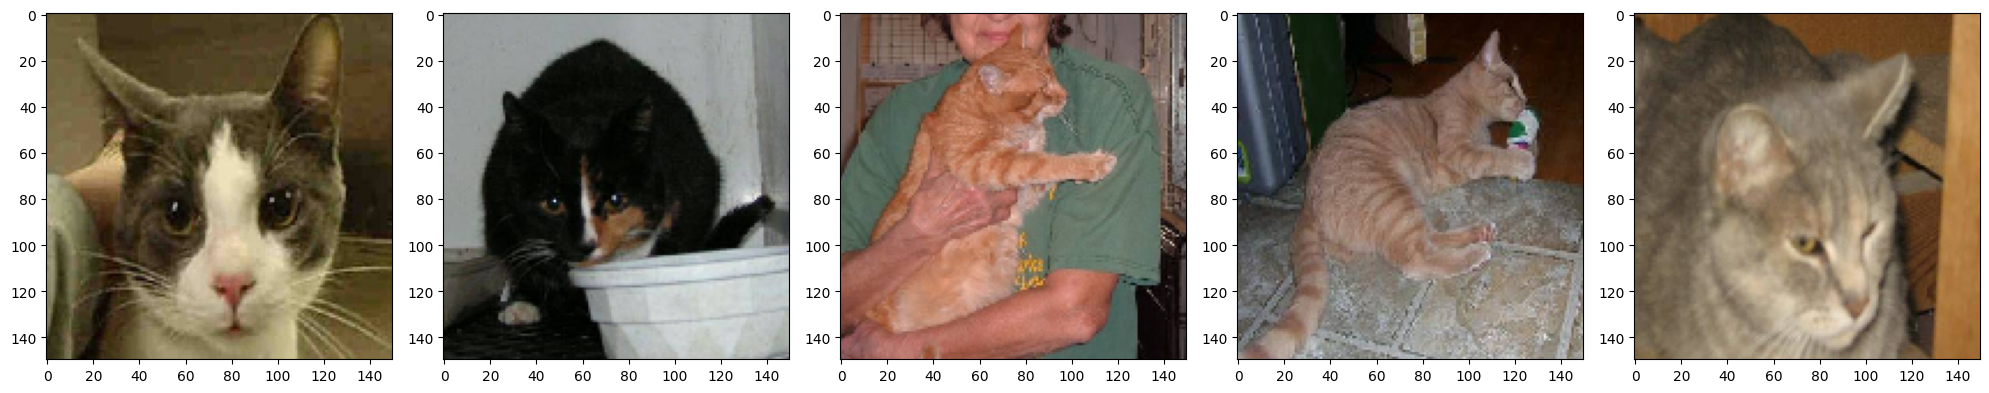

In [29]:
def plot_images(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

images, _ = next(val_data_gen)

plot_images(images[:20])

In [28]:
model.predict(images[:10])

1/1 [==============================] - 0s 333ms/step


array([[2.0842327e-13],
       [4.5185012e-01],
       [5.8338144e-05],
       [7.0683811e-05],
       [4.1849990e-03],
       [4.9528910e-07],
       [4.5864894e-08],
       [1.4795470e-05],
       [6.1888168e-05],
       [7.4212497e-01]], dtype=float32)